###### U20EC147
# Experiment 10
##### Aim : Design auto encoder and decoder, and train it on mnist handwritten dataset.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
nf = 0.4
x_train_noisy = x_train + nf*np.random.normal(0,1,x_train.shape)
x_test_noisy = x_test + nf*np.random.normal(0,1, x_test.shape)
t_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [ ]:
# Flatten the images (28x28) into 10 vectors (784)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
x_train_noisy = x_train_noisy.reshape((len(x_train_noisy), -1))
x_test_noisy =x_test_noisy.reshape((len(x_test_noisy), -1))

# Define the autoencoder architecture
input_img = tf.keras.layers. Input (shape=(784,))
encoded = tf.keras.layers.Dense (256, activation='relu') (input_img)
encoded = tf.keras.layers.Dense (128, activation='relu') (encoded)
decoded = tf.keras.layers.Dense (128, activation='relu') (encoded)
decoded = tf.keras.layers.Dense (256, activation='sigmoid') (decoded)
decoded = tf.keras.layers.Dense (784, activation='sigmoid') (decoded)
autoencoder = tf.keras.models.Model (input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_11 (Dense)            (None, 256)               200960    
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 256)               33024     
                                                                 
 dense_15 (Dense)            (None, 784)               201488    
                                                                 
Total params: 484880 (1.85 MB)
Trainable params: 484880 (1.

In [ ]:
autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=128, validation_data=(x_test_noisy, x_test))

Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 0.0523 - val_loss: 0.0435
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0320 - val_loss: 0.0367
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0253 - val_loss: 0.0319
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0216 - val_loss: 0.0288
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0191 - val_loss: 0.0288
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.0174 - val_loss: 0.0251
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0162 - val_loss: 0.0245
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0152 - val_loss: 0.0220
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0144 - val_loss: 0.0212
Epoch 10/20
469/469 [==============================] - 2s 5ms/step - loss: 0.0137 - val_loss: 0.0194

In [ ]:
def psnr (y_true, y_pred):
  max_pixel = 1.
  mse = tf.keras.backend.mean(tf.keras.backend.square(y_true - y_pred))
  return 20 * tf.keras.backend.log(max_pixel / tf.keras.backend.sqrt(mse))

In [ ]:
decoded_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


In [ ]:
psnr_values = []
for i in range(len(x_test)):
  psnr_value = psnr(x_test[i], decoded_images[i]).numpy()
  psnr_values.append(psnr_value)

avg_psnr = np.mean(psnr_values)
avg_psnr

41.04353

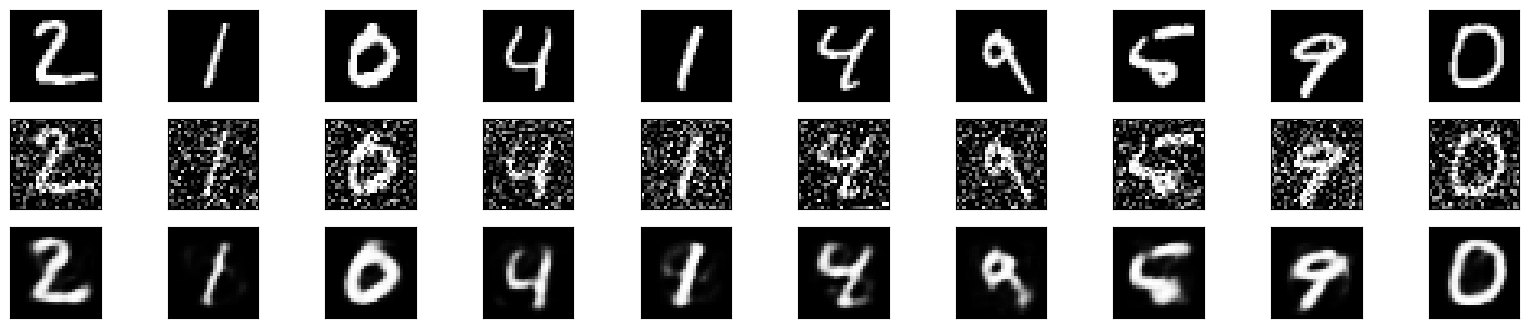

In [ ]:
n = 10
plt.figure(figsize=(20,4))
for i in range(1, n+1):
  # Original Images
  ax = plt.subplot(3, n, i)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Noisy Images
  ax = plt.subplot(3, n, i + n)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Denoised Images
  ax = plt.subplot(3, n, i + 2 * n)
  plt.imshow(decoded_images[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()